In [313]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

## Challenge 1

In [314]:
#Generate (fake) data that is linearly related to log(x)
x = [x/10. for x in range(1, 301, 2)]

#You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

y = [4 + 1.2 * np.log(n) + random.random() for n in x]
df = pd.DataFrame({'y':y, 'x':x})
df.head()

,x,y
0,0.1,1.400266
1,0.3,3.247526
2,0.5,3.804411
3,0.7,3.949987
4,0.9,4.853320


In [315]:
#quadratic (second degree polynomial)
df['constant'] = 1
df['x2'] = df['x'] ** 2
df.head()

,x,y,constant,x2
0,0.1,1.400266,1,0.01
1,0.3,3.247526,1,0.09
2,0.5,3.804411,1,0.25
3,0.7,3.949987,1,0.49
4,0.9,4.853320,1,0.81


In [316]:
quad = smf.ols(formula = 'y ~ x2', data=df).fit()
y_pred = quad.predict(df[['x2']])

Text(0.5,1,'Quadratic Fit')

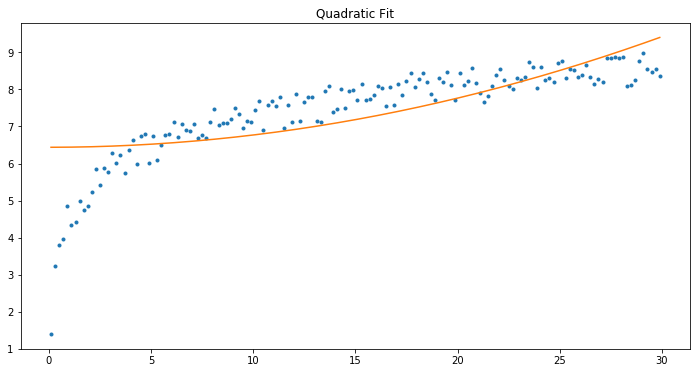

In [317]:
#plot quadratic fit
plt.figure(figsize=(12,6))
plt.plot(df.x, df.y, '.', df.x, y_pred)
plt.title('Quadratic Fit')

In [318]:
# Logarithmic (log(x))
df['log'] = df['x'].apply(math.log)
df.head()

,x,y,constant,x2,log
0,0.1,1.400266,1,0.01,-2.302585
1,0.3,3.247526,1,0.09,-1.203973
2,0.5,3.804411,1,0.25,-0.693147
3,0.7,3.949987,1,0.49,-0.356675
4,0.9,4.853320,1,0.81,-0.105361


In [319]:
log = smf.ols(formula = 'y~log', data = df).fit()
y_pred = log.predict(df[['log']])

Text(0.5,1,'Logarithimic Fit')

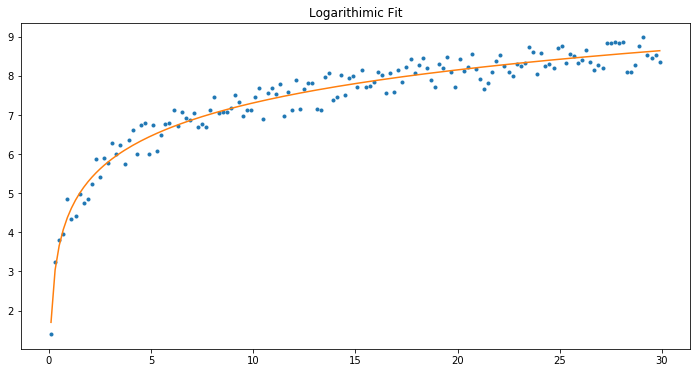

In [320]:
#plot logarithimic fit
plt.figure(figsize=(12,6))
plt.plot(df.x, df.y, '.', df.x, y_pred)
plt.title('Logarithimic Fit')

## Challenge 2

In [298]:
#Generate (fake) data that is linearly related to log(x)
x = [x/10 for x in range(1, 301, 2)]

#You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

y = [4 + 1.2 * n + 0.6 + n ** 2 + random.random() for n in x]
df = pd.DataFrame({'y':y, 'x':x, 'x':x})
df['x2'] = df['x'] ** 2
df.head()

,x,y,x2
0,0.1,5.151013,0.01
1,0.3,5.917744,0.09
2,0.5,5.459924,0.25
3,0.7,6.696108,0.49
4,0.9,7.075307,0.81


In [299]:
df['Constant'] = [1] * len(df)

In [300]:
y = df['y']
X = df[['Constant','x','x2']]

In [301]:
#train/test split

In [302]:
x_train, x_test, y_train, y_test = train_test_split(df[['x', 'x2']], df['y'], test_size=0.33, random_state=42)

In [303]:
model = smf.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.098e+06
Date:                Wed, 31 Jan 2018   Prob (F-statistic):          5.69e-236
Time:                        09:57:33   Log-Likelihood:                -194.29
No. Observations:                 100   AIC:                             392.6
Df Residuals:                      98   BIC:                             397.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.8719      0.040     46.946      0.000       1.793       1.951
x2             0.9812      0.002    563.127      0.000       0.978       0.985
==============================================================================
Omnibus:                       26.162   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.700
Skew:                           1.368   Prob(JB):                     1.77e-08
Kurtosis:                       4.042   Cond. No.                         93.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
#Calculate mean squared error on your training set.
y_train_pred = model.predict(x_train)
mean_squared_error(y_train, y_train_pred)

2.8518103856519907

In [305]:
#Then calculate it on your test set
y_test_pred = model.predict(x_test)
mean_squared_error(y_test, y_test_pred)

3.4424096856142881

## Challenge 3

In [306]:
# Plot the results of a pipeline against ground truth and actual data
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 5))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

ValueError: Expected 2D array, got 1D array instead:
array=[ 19.3  21.1  13.3   0.1  24.5  13.5   5.7   8.1   8.9  12.1  24.7   4.9
   5.1   4.7  18.9   7.9  19.1  23.5   9.5  19.5  22.7   6.7  27.7  20.3
  12.5  16.9  29.7  10.7   1.1  18.7  22.3   9.9   7.1  16.1  15.5   6.9
  22.9   1.5   8.7  14.1  19.7  24.1  16.7  26.9  27.1  17.9   1.7   2.7
  23.9  25.1   0.7   3.5   7.7  14.5  27.3   1.3  22.5  20.1   0.5  12.7
  10.9  25.3  10.1  23.1   9.3  27.9  12.3  29.5  15.9  11.9  18.3   8.3
  11.7  18.1   9.7  17.7  21.5  24.9   4.3  11.5  28.9  25.9   7.5  28.1
   0.3  10.5  26.1  20.7  19.9  23.3  17.5  14.9  24.3  29.9   4.1  14.3
  21.3   2.9  18.5  20.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

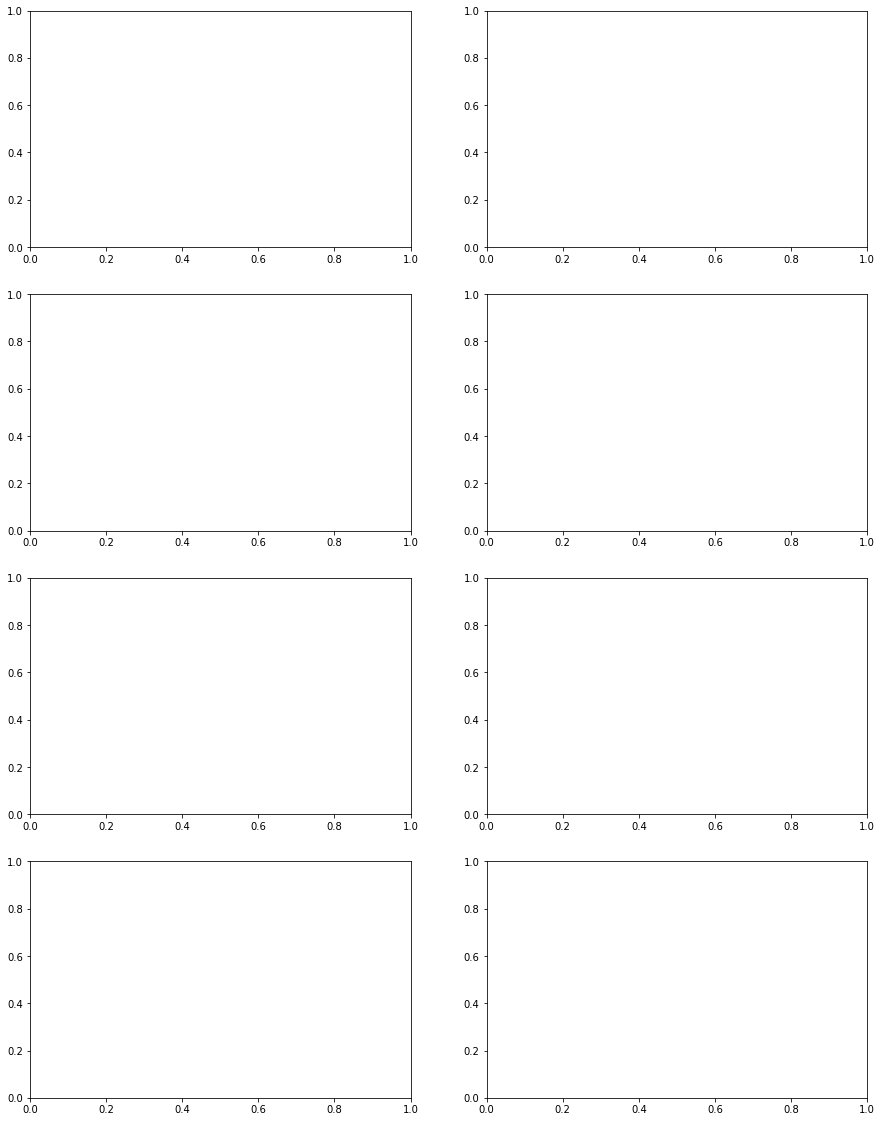

In [308]:
import numpy as np
# Step through degrees from 0 to 9 and store the training and test (generalization) error.
# This sets up 5 rows of 2 plots each (KEEP)
x_plot = np.linspace(-20,20,100)
fig, ax_rows = plt.subplots(4, 2, figsize=(15, 20))

for degree in range(8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    x_train, x_test, y_train, y_test = train_test_split(df['x'], df['y'], test_size=0.33, random_state=42)
    est_fit = est.fit(x_train, y_train)
    
    # This sets the appropriate axis for each degree (KEEP)
    ax_row_left, ax_row_right = ax_rows[degree//2]
    if degree%2 == 0:
        ax = ax_row_left
    else:
        ax = ax_row_right
    plot_approximation(est, ax, label='degree=%d' % degree)
    